In [ ]:
# Docker

## Подготовка модели к продакшену


### Сохранение и загрузка моделей: PMML и ONNX-ML

Среда или требования к **инференсу** модели для вашего проекта могут быть устроены так, что потребуют реализации на языке программирования, отличном от Python. Например, если компания разрабатывает десктопное приложение, то для внедрения модели её потребуется «перевести» на Java или C++. Как это сделать?

#### PREDICTIVE MODEL MARKUP LANGUAGE

В таких случаях используется генерация файла формата PMML (Predictive Model Markup Language).

> **PMML** — это XML-диалект, который применяется для описания статистических и DS-моделей. PMML-совместимые приложения позволяют легко обмениваться моделями данных между собой. Разработка и внедрение PMML осуществляется IT-консорциумом Data Mining Group.

#### Основные особенности PMML

1. *Независимость от языка программирования:* PMML позволяет хранить модели в формате, который можно использовать на любом языке или платформе, что делает модели переносимыми и удобными для применения в различных системах.

2. *Поддержка различных типов моделей:* PMML поддерживает множество типов моделей, включая:

* Регрессионные модели (линейная, логистическая регрессия)
* Деревья решений
* Нейронные сети
* Кластеризацию (например, K-средних)
* Ассоциативные правила (например, для анализа корзины покупок)
* Временные ряды и прогнозирование
* Градиентный бустинг, случайный лес, ансамблевые методы

3. *Интероперабельность:* Модель, сохранённая в PMML, может быть импортирована и использована другим PMML-совместимым приложением. Это особенно полезно для интеграции моделей в рабочие процессы и продукты, построенные на разных платформах.

4. *Отсутствие необходимости в дополнительном кодировании:* С помощью PMML можно избежать повторного программирования, что экономит время и снижает вероятность ошибок при переносе модели между разными системами.

К сожалению, далеко не все библиотеки для машинного обучения (в том числе sklearn) поддерживают возможность сохранения обученной модели в указанном формате. Однако для этого можно использовать сторонние библиотеки, и одной из самых популярных является Nyoka.

Давайте сохраним модель о диабете в формат PMML.

Для установки можно использовать систему управления пакетами pip:

In [ ]:
!pip3 install nyoka

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.0/304.0 kB 13.6 MB/s eta 0:00:00


Рассмотрим пример работы с библиотекой:

In [ ]:
from nyoka import skl_to_pmml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
cols = load_diabetes()['feature_names']

scaler = MinMaxScaler()
pipe = Pipeline([
            ('Scaling', MinMaxScaler()),
            ('Linear', LinearRegression())
        ])
# Обучение пайплайна, включающего линейную модель и нормализацию признаков
pipe.fit(X, y)
# Сохраним пайплайн в формате pmml в файл pipeline.pmml
skl_to_pmml(pipeline=pipe, col_names=cols, pmml_f_name="pipeline.pmml")

Итак, мы построили пайплайн обработки данных и обучили модель линейной регрессии. После этого мы с помощью функции `skl_to_pmml` сохранили модель в файл `pipe.pmml`.

#### OPEN NEURAL NETWORK EXCHANGE

В разработке моделей на основе нейронных сетей сегодня наиболее распространён формат ONNX (Open Neural Network Exchange).

> **ONNX** (Open Neural Network Exchange) — это открытый стандарт для обеспечения совместимости моделей машинного обучения. Он позволяет разработчикам искусственного интеллекта использовать модели с различными инфраструктурами, инструментами, средами исполнения и компиляторами.

#### Основные характеристики ONNX

1. *Совместимость с различными фреймворками:* ONNX поддерживается многими популярными библиотеками и инструментами для машинного обучения, такими как PyTorch, TensorFlow, Scikit-learn и другими. Это позволяет пользователям переключаться между фреймворками, не теряя созданные модели.

2. *Стандартизированный формат:* Формат ONNX основан на открытом стандартном формате для описания моделей нейронных сетей и предоставляет единый способ представления данных и архитектур моделей. Это облегчает обмен моделями между командами и проектами.

3. *Поддержка широкого спектра операторов:* ONNX включает множество операторов, которые поддерживают различные архитектуры нейронных сетей. Это позволяет моделям, содержащим сложные структуры, такие как сверточные или рекуррентные нейронные сети, быть легко экспортированными и импортированными.

4. *Инструменты для конвертации:* Существуют инструменты для конвертации моделей из различных фреймворков в формат ONNX и обратно. Это включает в себя такие утилиты, как tf2onnx (для TensorFlow) и pytorch.onnx (для PyTorch), которые упрощают процесс преобразования.

5. *Оптимизация и ускорение:* ONNX поддерживает интеграцию с различными компиляторами и ускорителями (такими как ONNX Runtime), которые позволяют оптимизировать производительность модели на различных устройствах и архитектурах, включая CPU, GPU и специализированные аппаратные средства, такие как TPU.

### МОДЕЛИ СЕТЕВОГО ВЗАИМОДЕЙСТВИЯ

Поговорим о том, как происходит взаимодействие между серверами по сети, то есть разберём процесс обмена информацией между компьютерами.

Наиболее известные модели сетевого взаимодействия — OSI и TCP/IP.

Модель **OSI** была разработана Международной организацией по стандартизации (ISO) и представлена в 1984 году. Она состоит из семи слоев, каждый из которых выполняет определенные функции в процессе передачи данных по сети. Эти слои от верхнего к нижнему:

1. *Прикладной уровень (Application Layer):*

 Предоставляет интерфейсы для взаимодействия с сетевыми приложениями.
Примеры протоколов: HTTP, FTP, SMTP.


2. *Уровень представления (Presentation Layer):*

 Обеспечивает преобразование данных в формат, понятный приложению, включая шифрование и сжатие.

3. *Уровень сеанса (Session Layer):*

 Управляет сеансами связи между приложениями, устанавливая, поддерживая и завершая соединения.

4. *Транспортный уровень (Transport Layer):*

 Обеспечивает надежную передачу данных между узлами сети, включая сегментацию, управление потоком и обнаружение ошибок.
Примеры протоколов: TCP, UDP.

5. *Сетевой уровень (Network Layer):*

 Отвечает за маршрутизацию пакетов данных через сеть и управление адресацией.
Пример протокола: IP.

6. *Канальный уровень (Data Link Layer):*

 Обеспечивает надежную передачу данных между узлами на одной физической сети и управляет доступом к среде передачи.
Примеры протоколов: Ethernet, PPP.

7. *Физический уровень (Physical Layer):*

 Описывает физическую среду передачи данных, включая электрические сигналы, разъемы, кабели и другие аппаратные средства.

Модель **TCP/IP** была разработана для поддержки работы интернета и представляет собой более простую модель по сравнению с OSI. Она состоит из четырех слоев, которые обобщают функции моделей OSI:

1. *Уровень приложений (Application Layer):*

 Соответствует верхним трем уровням модели OSI (приложение, представление и сеанс).
Включает протоколы, такие как HTTP, FTP, SMTP и DNS.

2. *Транспортный уровень (Transport Layer):*

 Соответствует транспортному уровню модели OSI.
Обеспечивает надежность и управление передачей данных, включая протоколы TCP (надежный) и UDP (ненадежный).

3. *Сетевой уровень (Internet Layer):*

 Соответствует сетевому уровню модели OSI.
Обеспечивает маршрутизацию и адресацию, включая протокол IP.

4. *Уровень доступа к сети (Network Interface Layer):*

 Объединяет функции канального и физического уровней модели OSI.
Описывает методы доступа к среде передачи и включает технологии, такие как Ethernet и Wi-Fi.

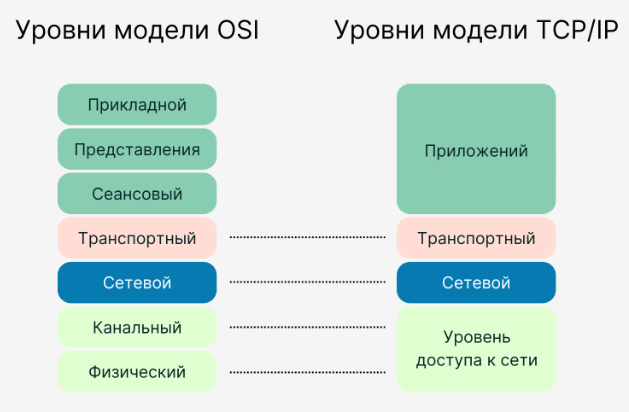

Эти модели распределяют сетевые протоколы по разным уровням взаимодействия. Что такое протокол?

> **Протокол** — это некоторый набор правил, определяющий принципы взаимодействия устройств в сети. В нашем случае это правила, по которым программа, получив по сети набор битов, понимает, как его прочитать и что он значит.

Для того чтобы обмен информацией между устройствами проходил успешно, все устройства (участники процесса) должны следовать условиям протокола. В сети поддержка протоколов встраивается или в аппаратную (в «железо»), или в программную часть (в код системы), или в обе этих части.

На схеме ниже представлены примеры протоколов, а также уровни их распределения в модели TCP/IP:

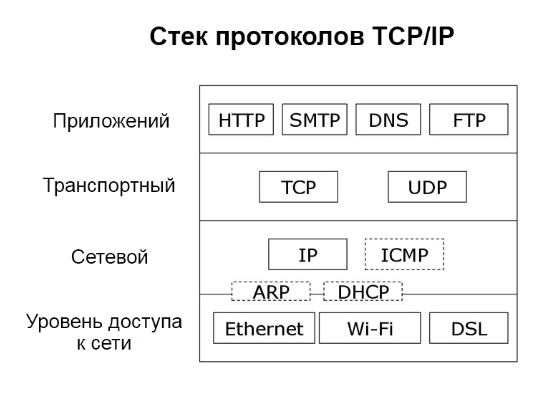

В процессе сетевого взаимодействия участвуют как минимум два устройства — устройство-отправитель и устройство-получатель. Говоря простым языком, каждая из моделей сетевых взаимодействий устанавливает правила и регламенты по отправке сообщений между компьютерами.

Отправленное сообщение проходит все уровни, начиная от прикладного уровня приложений и заканчивая физическим уровнем доступа к сети. Когда сообщение доходит до адресата, оно также проходит все уровни в обратном порядке.

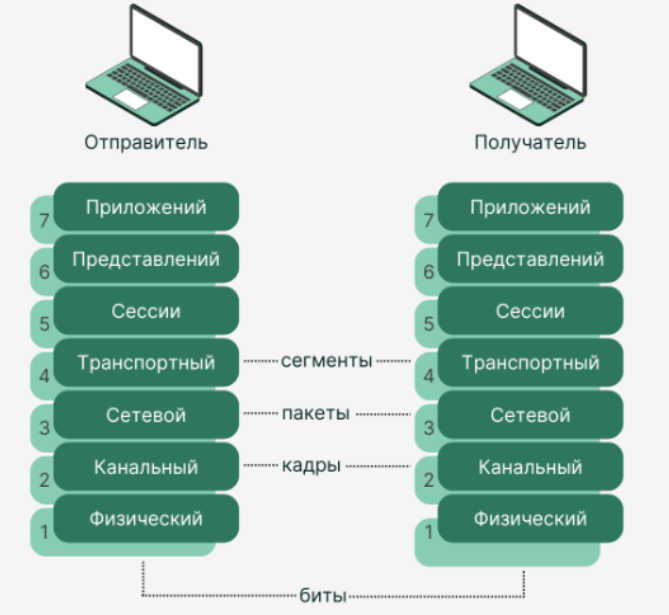

Если привести аналогию из жизни, можно сказать, что обе модели описывают правила, по которым мем, который вы отправляете другу в мессенджере, будет преобразован до битов данных, передаваемых по электрическим проводам, а затем будет восстановлен по этим же битам и отображён на экране устройства вашего друга.

Для наших целей (деплой модели в прод) достаточно уметь работать всего с тремя протоколами:

> IP — протокол сетевого уровня. Он определяет путь, по которому передаются данные.

> TCP — соответствует транспортному уровню, а значит, определяет, как передаются данные.

> HTTP — относится к прикладному уровню, описывающему взаимодействие приложений с сетью.

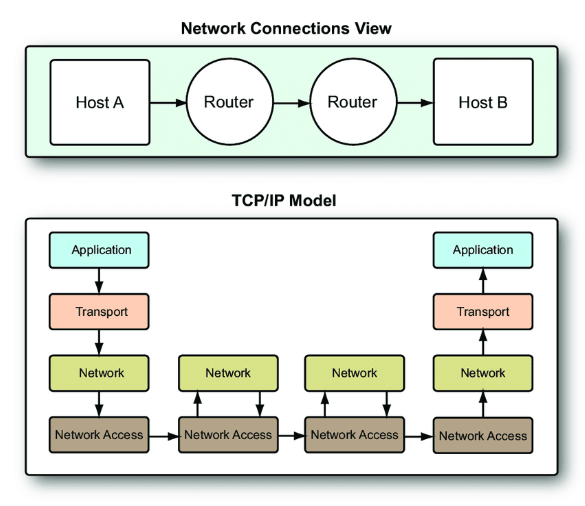

#### **IP**

> **IP** (Internet Protocol) — один из главных протоколов сетевого взаимодействия. Он отвечает за маршрутизацию трафика по сети, то есть определяет путь, по которому отправятся данные. Данные передаются пакетами (или **датаграммами**), которые формирует протокол IP.

Важным свойством IP является отсутствие гарантированной доставки пакетов и их цельности: пакеты могут прийти в другой очерёдности (не в той, в которой их отправляли), прийти повреждёнными (тогда они уничтожаются) или вообще не прийти.

Путь, по которому отправятся данные, строится на основе IP-адресов.

> **IP-адрес** — это уникальный адрес, используемый для связи устройств внутри сети.

IP-адрес устроен довольно просто: чаще всего это четыре числа, разделённых точками (такой формат поддерживается в протоколе IPv4). Например, вот один из самых популярных IP-адресов — 192.168.0.1. Вы могли вводить его, чтобы зайти в настройки своего роутера.

Каждое из чисел в адресе — это восьмизначное двоичное число, или, правильнее говорить, октет. Оно может принимать значения от 0000 0000 до 1111 1111 в двоичной системе или от 0 до 255 — в десятичной системе счисления, то есть 256 разных значений.

Получается, что диапазон IP-адресов стартует с 0.0.0.0 и заканчивается 255.255.255.255. Если посчитать количество всех адресов в этом диапазоне, получится чуть больше четырёх миллиардов.

Уникальность IP-адреса может быть глобальной (в рамках всего интернета) или локальной (в рамках локальной подсети). Некоторые IP-адреса не являются общедоступными и зарезервированы для специальных целей, например диапазоны IP-адресов:

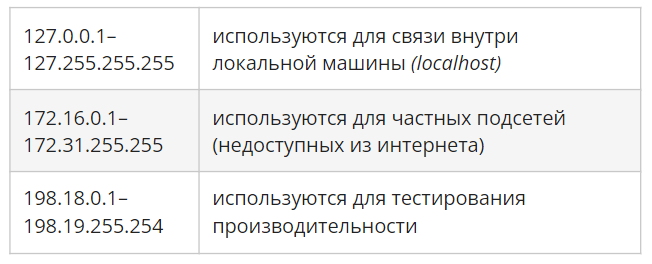

> **localhost** — зарезервированное доменное имя для IP-адресов из диапазона 127.0.0.1–127.255.255.255 (в сети из одного компьютера — для 127.0.0.1).

В компьютерной сети localhost относится к компьютеру, на котором запущена программа. Компьютер работает как виртуальный сервер. Тем самым создаётся так называемая «внутренняя петля»: обращаясь по IP-адресу localhost, вы, по сути, заставляете компьютер общаться с самим собой (хотя на самом деле внутри всё немного сложнее). Это нужно, например, для разработки и тестирования клиент-серверных приложений на одной машине (то есть и клиент, и сервер находятся на одном компьютере), что позволяет при разработке не использовать сетевое оборудование, дополнительные программные модули и тому подобное.

##### Вопросы:
- Что такое сетевой протокол?
- Что такое IP?

#### **TCP**

> **TCP** (Transmission Control Protocol) — протокол транспортного уровня. Он отвечает за управление передачей данных и гарантирует:
 * доставку пакетов (посылает пакеты повторно, если они не были доставлены);
 * последовательность и целостность доставки пакетов (используя нумерацию и контрольные суммы для проверки);
 * устраняет дубликаты в случае необходимости.

Важной особенностью TCP является то, что перед отправкой данных он «устанавливает соединение» с получателем — обменивается управляющей информацией. После отправки пакетов источник ждёт подтверждения от получателя, что пакеты были доставлены.

Обычно на одном **узле сети** (сервере, компьютере) работают несколько приложений/процессов одновременно. Для идентификации приложения на источнике и получателе используется **порт**, который задаётся целым неотрицательным числом. Процесс или приложение могут зарезервировать у ОС определённый порт, например, для передачи данных по сети.

Порты разделяют на системные (0–1023), и пользовательские (1024–49151). Некоторые номера портов определены для конкретных приложений, например:

* 22 — протокол SSH для безопасной передачи данных;
* 25 — протокол SMTP для незащищённой передачи e-mail-сообщений;
* 80 — протокол HTTP.

Например, если приложение доступно по адресу 172.16.0.11:8001, это значит следующее:

* 172.16.0.11 — IP-адрес;
* 8001 — TCP-порт, отведённый приложению.

#### **HTTP**

> **HTTP** — это наиболее широко используемый протокол. Все сайты, на которые вы заходите, работают по этому протоколу. Он был разработан именно для передачи содержимого HTML-страниц в интернете, но впоследствии стал использоваться и для других целей. Например, HTTP применяется для налаживания взаимодействия между сервисами в сложных системах. Этим он нам и интересен.

Итак, HTTP — это протокол, который работает по принципу клиент-сервер.

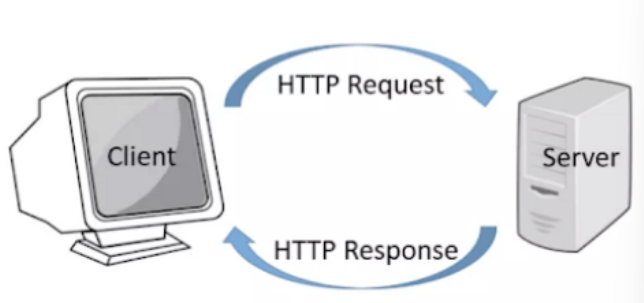

Это означает, что во взаимодействии участвует две программы, причём в разных ролях. Одна из них — клиент, или «заказчик услуг», формирует запрос и отправляет его к серверу. Сервер, или «поставщик услуг», получив запрос, обрабатывает его, формирует ответ и возвращает его клиенту.

#### СТРУКТУРА HTTP-ЗАПРОСОВ

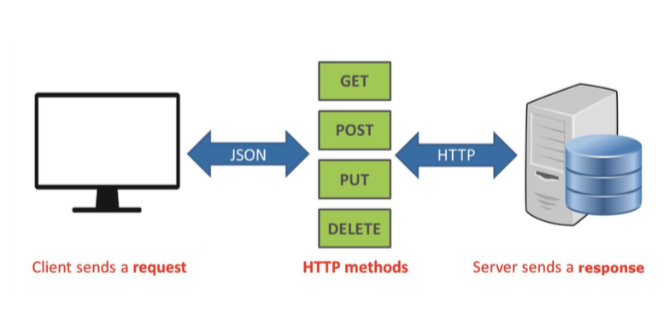

Запрос и ответ в HTTP являются строками, составленными в соответствии с протоколом.

**Запрос** состоит из трёх частей.



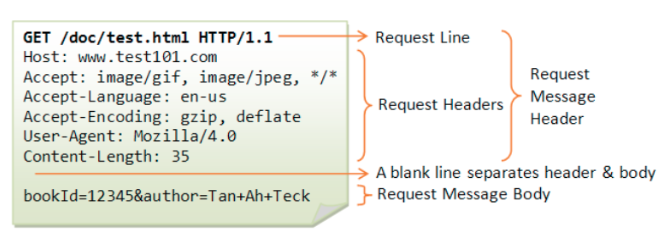

1. **Стартовая строка**, или Request Line — по ней определяется вид запроса.

2. **Заголовки запроса**, или Request Headers — дополнительные параметры запроса, в которых обычно передаётся служебная информация, например, в каком формате ожидается ответ или информация о клиенте.

3. **Тело запроса**, или Request Message Body — содержит данные для передачи. Эта часть присутствует не всегда.

Давайте чуть подробнее разберём первую часть.

Первое, что указано в стартовой строке — это **метод**, или тип запроса. Есть набор стандартных методов, но теоретически вы можете создавать и свои.

**Основные методы:**

* GET — обычно означает получение содержимого ресурса и не содержит тела.

Например, когда вы заходите в каталог интернет-магазина, вы получаете страницу с товарами — ваш браузер отправляет GET-запрос на сервер интернет-магазина.

* POST — наоборот, передача данных ресурсу.

Например, когда вы заполняете форму авторизации на любом сайте и нажимаете кнопку для отправки своих данных, вы совершаете POST-запрос на сервер ресурса.



* PUT — обновление ресурса.
* DELETE — удаление ресурса.

В HTTP мы работаем с ресурсами, которые расположены по некоторому адресу на сервере. Изначально под ресурсами понимались HTML-файлы на сайте (вёрстка сайта), но сейчас это уже некоторое абстрактное понятие.

**Адрес ресурса**, или URI (Uniform Resource Identifier) — это то, что вы видите в адресной строке браузера. Он следует за методом в стартовой строке запроса.

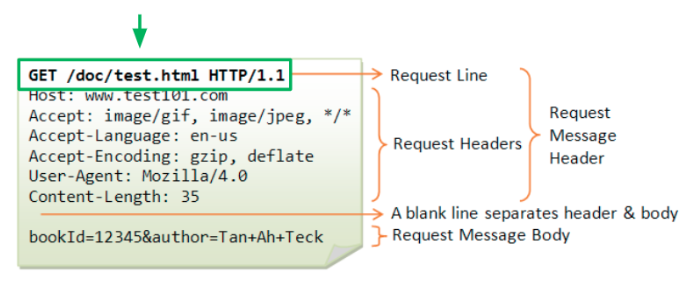

Последней идёт версия HTTP-протокола (кстати, последняя актуальная версия, 1.1, появилась ещё в 1999 году).

**Ответ** также состоит из стартовой строки, заголовков и тела.

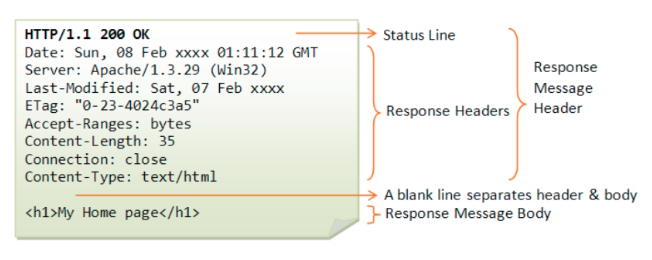

Основное отличие — в стартовой строке: там вместо метода и URI указывается код состояния. Это численное значение, которое показывает результат обработки. Коды задаются протоколом, и вы наверняка встречали «ошибку 404» на сайтах.

404 — это как раз код состояния, означающий, что ресурса с заданным URI не существует на сервере.

Группы кодов состояния ответа HTTP-сервера делятся на следующие группы:

* информационные (100–199);
* успешно (200–299);
* перенаправление (300–399);
* ошибка клиента (400–499);
* ошибка сервера (500–599).

**Примеры:**

Код 200 означает, что запрос обработан успешно.

Код 500 означает, что сервер не смог обработать запрос.

### REST (Representational State Transfer)

Cпецификация HTTP не обязывает сервер понимать все методы, а также не указывает серверу, что он должен делать при получении запроса с тем или иным методом. Поэтому был изобретён архитектурный стиль REST.

Он даёт более верхнеуровневые указания, чем HTTP-протокол, а именно:

* как правильно организовывать адресацию к ресурсам;
* какие методы у этих ресурсов должны быть;
* какой ожидается результат.

Основная концепция философии REST заключается в том, что клиентом RESTful-сервера может быть что/кто угодно: браузер, другое приложение, разработчик. Веб-приложение, спроектированное по правилам REST, предоставляет информацию о себе в форме информации о своих ресурсах.

Ресурс может быть любым объектом, о котором сервер предоставляет информацию. Например, в API Instagram ресурсом может быть пользователь, фотография, хэштег. Каждая единица информации (ресурс) однозначно определяется URL.

* GET-запрос /rest/users — получение информации обо всех пользователях.
* GET-запрос /rest/users/125 — получение информации о пользователе с id=125.
* POST-запрос /rest/users — добавление нового пользователя.
* PUT-запрос /rest/users/125 — изменение информации о пользователе с id=125.
* DELETE-запрос /rest/users/125 — удаление пользователя с id=125.

Поскольку спецификация REST является общепризнанной и широко распространённой, то следовать ей очень полезно.

Если вы говорите, что ваш сервис RESTful (то есть построен по этой спецификации), то любой разработчик сразу поймёт, как примерно устроен сервис, а значит, сможет быстро начать им пользоваться: отправлять правильные запросы и получать тот результат, который ожидает.

### Промежуточные итоги

Для того чтобы наладить взаимодействие по HTTP, на стороне **клиента** вам необходимо сформировать запрос: указать адрес, куда отправится запрос, выбрать метод, а также задать заголовки и тело запроса, если это нужно для выбранного метода.

На стороне **сервера** при получении запроса необходимо знать, какой ресурс запрошен, чтобы понять, каким кодом его обрабатывать. Этот код, в зависимости от того, что он должен делать, может проверить значения заголовков и/или прочитать тело запроса.

##### Вопросы:
- Какие бывают методы запросов?
- Что они означают?

### Деплой модели. Обзор фреймворков

Рассмотрим, какие существуют веб-фреймворки Python, которые позволяют реализовать серверную часть приложения и обеспечить к нему клиентский доступ.

#### FLASK

**Flask** — это популярный микрофреймворк для веб-разработки на языке Python. Он был создан Армином Рончертом в 2010 году и с тех пор стал одним из наиболее широко используемых инструментов для разработки веб-приложений. Flask особенно ценится за свою простоту, легкость в использовании и гибкость, что делает его идеальным выбором как для новичков, так и для опытных разработчиков.

Flask позиционируется как микрофреймворк для написания **легковесных** сервисов, но при этом он достаточно гибкий и кастомизируемый, что позволяет использовать его в проектах любой сложности. Как и все остальные фреймворки, он работает на основе **маршрутизации запросов**, приходящих на сервер, который и должен обработать эти запросы.

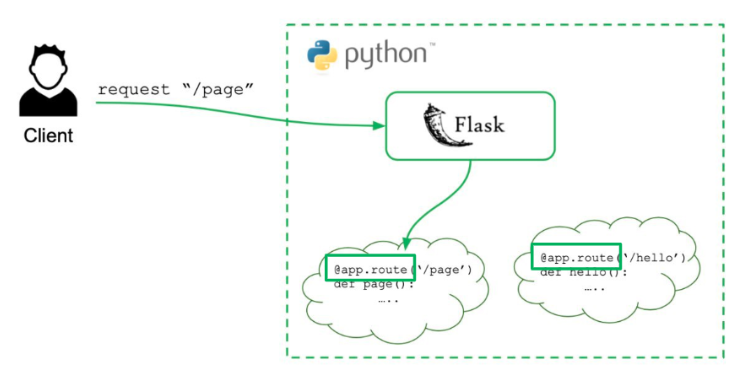

В случае с Flask маршрутизация выглядит как обычные функции Python, которые вы помечаете специальным **декоратором** `@app.route`. Он связывает эту функцию с адресом, на который приходит запрос. В этой функции вы должны разобрать **параметры запроса**, возможно, выполнить какую-то логику и вернуть ответ клиенту.

Таким образом, для написания минимально функционального сервера достаточно добавить в скрипт всего несколько строк: необходимые импорты, создание Flask-приложения, декоратор, который свяжет адрес (endpoint, **эндпоинт**) с функцией, и запуск приложения. Последнее как раз и запустит работу Flask: он будет слушать запросы, маршрутизировать их и возвращать ответ.

> Что такое эндпоинт?

> Рассмотрим на примере. Сайт почты Mail.ru имеет адрес https://e.mail.ru. Для того чтобы попасть в папку со входящими письмами, необходимо обратиться к соответствующему интерфейсу приложения. Для этого к адресу сайта добавляется /inbox/: https://e.mail.ru/inbox. Интерфейс, который предоставляет доступ к вашим отправленным письмам, находится по адресу https://e.mail.ru/sent/. Получается, что /inbox/ и /sent/ — это и есть эндпоинты.

У Flask есть множество продвинутых функций и плагинов, написанных сторонними разработчиками для решения самых разных задач. Однако нам достаточно научиться работать с Flask на минимальном уровне, чтобы вывести свою модель как отдельный маленький сервис (микросервис), решающий одну конкретную задачу — к сервису можно обращаться по сети и получать результаты (предсказания модели).

Реализация глобальной структуры сервиса (веб-приложения) и встраивание этой структуры в микросервис — это уже задача других специалистов, например веб-разработчиков.

#### DJANGO

**Django** — это высокоуровневый веб-фреймворк для Python, который способствует быстрому развитию веб-приложений и упрощает создание сложных, безопасных и масштабируемых веб-сайтов. Он был создан в 2003 году в рамках проекта по разработке новостного сайта, и с тех пор стал одним из самых популярных фреймворков для веб-разработки.

В отличие от Flask, Django нельзя назвать микрофреймворком. Напротив, даже минимальный проект для Django обычно генерируется **специальными скриптами** и включает с десяток файлов и папок.

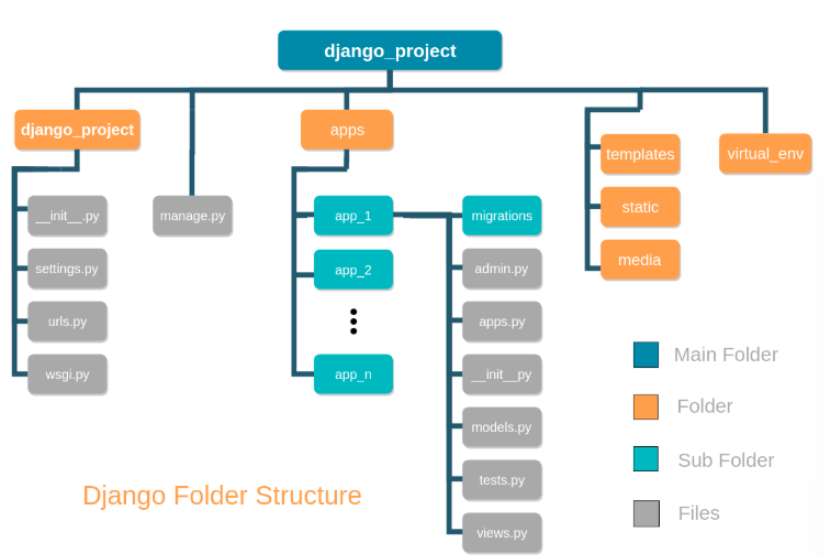

Такая сложная структура нужна для громоздких приложений, чтобы не путаться в коде. Поэтому Django используют, когда нужно что-то посерьёзней, например целые сайты с базами данных.

**ПРЕИМУЩЕСТВА DJANGO:**

* Мощный движок для рендера HTML-страниц, основанный на шаблонах.

* Собственный ORM.

* Огромное количество дополнительных плагинов. Один из них практически так же популярен, как и сам Django — речь о Django Rest Framework. Основываясь на ORM, он позволяет в несколько строк реализовывать эндпоинты протокола RESTful. Сам Django Rest Framework также имеет множество расширений. Благодаря этому написание сложного проекта можно свести в составлению правильной модели данных, установке и настройке подходящих расширений.

### FLASK vs DJANGO

Давайте более подробно рассмотрим характеристики Flask и Django и узнаем, чем отличаются и чем похожи эти два фреймворка.

В Django есть модули для очень широкой функциональности. Чтобы получить к ним доступ, надо просто добавить нужную настройку в конфигурацию. Это отлично перекликается с девизом Django: “The web framework for perfectionists with deadlines” («Веб-фреймворк для перфекционистов, которые придерживаются сроков»).

Во Flask всё наоборот: сам фреймворк предоставляет только базовую функциональность. «Из коробки» будет доступно направление по адресам эндпойнтов, обработка запросов и ошибок, дебаггер и некоторые другие функции, явно связанные с сервером. Например, чтобы добавить авторизацию, придётся устанавливать **стороннюю библиотеку**. При этом вы можете выбрать ту, которая лучше подходит текущему проекту, лучше поддерживается или просто более удобна в использовании, а можете вообще не подключать библиотеки.

Flask нужен для оборачивания **инференса модели в API**, когда, например, по поступившему запросу запускается предикт модели. Знание Flask пригодится и на этапе создания прототипа, и на этапе тестирования.

Также некоторые компании строят весь продакшен на Flask, а значит, знать его основы будет полезно.

В связи с тем, что Django выпускается в релиз вместе со всеми сопутствующими модулями, у него достаточно длинные релиз-циклы. С Flask эта проблема менее актуальна: если какой-то функциональности не хватает, часто она есть в какой-то библиотеке. Этот подход жизнеспособен, потому что у Flask большое сообщество разработчиков, которые занимаются поддержкой библиотек для этого фреймворка.

Flask приобрёл популярность именно благодаря небольшим приложениям, для которых Django казался избыточным. Однако сегодня Flask используется не только для таких приложений.

Для справки приведём инструментарий, используемый в Django и Flask, чтобы продемонстировать, как фреймворки отличаются друг от друга по функциональности. Запоминать таблицу не нужно.

*Примечание*. При разработке на Flask список чаще всего не ограничивается перечисленными в таблице библиотеками — здесь собраны только наиболее популярные и известные. Также есть библиотеки, у которых есть специальные расширения для Flask. Чаще всего они не обязательны для работы с библиотекой, но могут быть полезны.

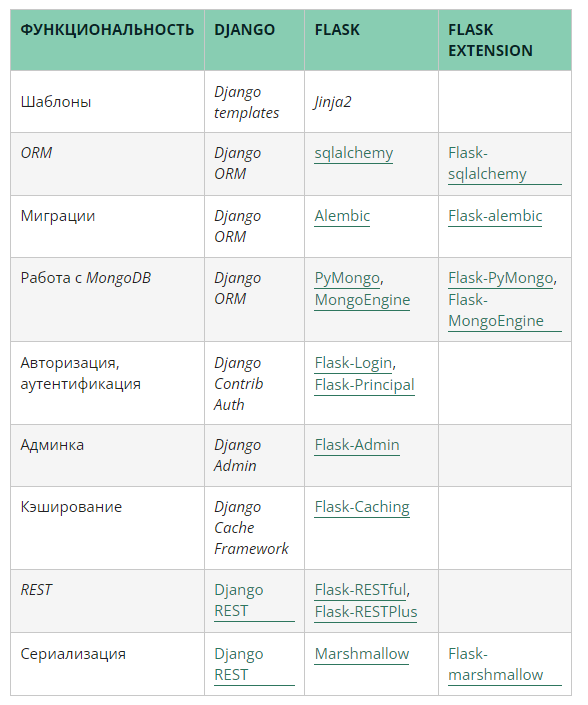

**КТО ПОБЕДИЛ?**

Как мы видим, для основной функциональности, реализованной в Django, есть аналоги, которые работают с Flask. Нельзя сказать, что какой-то из фреймворков проигрывает другому по большому числу параметров.

Однако стоит понимать, что, выбирая Django, вы оставляете проект со всей экосистемой Django, и что-то изменить впоследствии будет трудно. Выбирая Flask, вы получаете систему, построенную из блоков, каждый из которых проще заменить.

### FASTAPI

**FastAPI** — это современный, быстрый (высокопроизводительный) веб-фреймворк для создания API на языке Python, который основан на стандартных Python-типах и аннотациях. FastAPI был разработан Себастьяном Рамиресом и впервые представлен в 2018 году. Он оптимизирован для быстрого развертывания, простоты использования и предоставляет мощные функции для построения RESTful API и веб-приложений.

Возможно, через некоторое время он превратится в стандарт индустрии, заменив Flask.

*Примечание*. Да-да, именно Flask! FastAPI тоже позиционируется как легковесный фреймворк. Более того, принцип его использования очень похож на Flask. Авторы утверждают, что, вдохновившись Flask, они написали более быстрый (за счёт использования более современных протоколов), но при этом не уступающий по функциональности фреймворк.

Основное нововведение в FastAPI — интеграция библиотеки pydantic, которая позволяет **декларативно** описывать структуры запросов.

Также в FastAPI есть поддержка асинхронных функций и реализация парадигмы Dependency Injection.

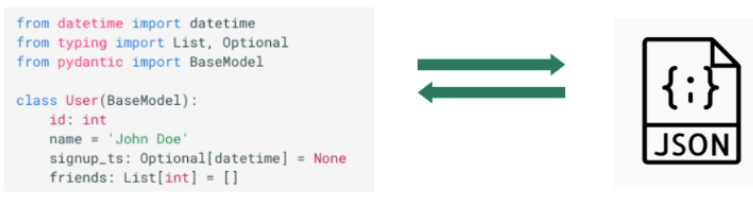

> **Асинхронная функция**, или асинхронный метод — это функция, которая может быть приостановлена во время выполнения.

### ДРУГИЕ ФРЕЙМВОРКИ

Фреймворк aiohttp тоже близок к Flask, но основан на асинхронном взаимодействии.

**aiohttp** — это асинхронный фреймворк для создания веб-приложений и API на языке Python. Он основан на библиотеке asyncio, которая позволяет писать асинхронный код, что делает aiohttp идеальным выбором для приложений, требующих высокой производительности и масштабируемости.

Aiohttp добавлен в Python версии 3.4.

**Tornado** — относительно старый и более общий асинхронный фреймворк для написания сетевых приложений, но также он умеет работать с HTTP. По заверениям разработчиков, он очень хорошо держит нагрузку. В 2019 году Tornado занимал третье место по популярности среди разработчиков после Django и Flask.

Tornado изначально был создан для поддержки FriendFeed, сервиса для агрегирования новостей, который был куплен Facebook.

### ИНИЦИАЛИЗАЦИЯ ВЕБ-ПРИЛОЖЕНИЯ

### **ПЕРЕХОДИМ В VS CODE**

**Декоратор в Python** — это функция, которая принимает другую функцию в качестве аргумента, добавляет к ней дополнительную функциональность и возвращает функцию с изменённым поведением.

Декораторы позволяют изменять поведение функций и классов с помощью добавления или изменения их функциональности без изменения самого кода.

Принцип работы декоратора:
- Принимает функцию как аргумент.
- Объявляет новую функцию, которая расширяет функцию-аргумент.
- Возвращает новую функцию в качестве объекта.

Для избегания прямого присвоения функций, в Python используют конструкцию @<имя декоратора, которая автоматически декорирует выбранную функцию.

In [ ]:
def hello():
    print("hi")

In [ ]:
hello()

hi


In [ ]:
def hello_bye():
    print("bye")
    hello()
    print("bye")

In [ ]:
hello_bye()

hi
bye


Сначала необходимо установить Flask. Сделать это можно с помощью pip:

`pip install flask`

Теперь импортируем его и создадим объект Flask-приложения.


```
from flask import Flask
app = Flask(__name__)
```


Мы передаём __name__ при инициализации класса Flask, чтобы определить имя, с которым будет использоваться этот модуль. Flask использует расположение файла как точку, к которой он привязывает ресурсы.

> Совет. В абсолютном большинстве случаев можно передавать аргумент __name__ для инициализации класса — приложение будет настроено верно.

Теперь мы можем написать функцию, которая будет обрабатывать запросы, и прикрепить её к какому-то пути (URI). Это делается с помощью специального декоратора route.

```
@app.route('/hello')
def hello_func():
    return 'hello!'
```

Наша функция пока не делает никакой обработки и просто отвечает строкой с приветствием. Нам осталось запустить приложение. Для этого выполним метод run, не забыв занести его в стандартный main.

```
if __name__ == '__main__':
    app.run('localhost', 5000)
```

>В блоке if __name__ == '__main__' прописывается код, который не должен выполняться при импорте модуля. Переменная __name__ — это специальная переменная, которая будет равна "__main__", только если файл запускается как основная программа, и выставляется равной имени модуля при импорте модуля.

Например, если мы захотим импортировать файл server.py как внешний модуль,

```
from server import *
```

то код, указанный в блоке if __name__ == '__main__', соответствующий запуску сервера, не будет выполнен.

Мы запускаем наш сервис в строке app.run('localhost', 5000), указывая адрес сетевого интерфейса и порт, на котором будет работать сервер. В нашем случае мы работаем на локальной машине по IP-адресу 127.0.0.1, или localhost (то есть доступ к сервису может быть получен только с нашего компьютера), а номер порта, по которому можно отправлять запросы, — 5000.

Вы должны увидеть примерно такой текст:

```
* Serving Flask app "server" (lazy loading)

* Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
* Debug mode: off
* Running on http://localhost:5000/ (Press CTRL+C to quit)
```

После запуска программа перейдёт в режим прослушивания сети.

Теперь откройте браузер и зайдите по адресу http://localhost:5000/hello.

Вы увидите текст hello!, а в логах — строку с кодом обработки вашего запроса.

> Чтобы прервать работу программы-сервера в VS Code, нажмите сочетание клавиш CTRL + C, находясь в поле терминала. После этого перезапустите скрипт.

- Напишим новую функцию index(), которая будет возвращать строку "Test message. The server is running".
- Обернем эту функцию в декоратор app.route(), указав в качестве эндпоинта '/'. Данный эндпоинт будет соответствовать обращению к сайту по дефолтному адресу: http://localhost:5000/.

- Перезапустим веб-сервис и зайдите по этому адресу. В поле для ответа введите код обработки, который вернулся в результате выполнения GET-запроса.

```
@app.route('/')
def index():
    return "Test message. The server is running"
```

Для выполнения запроса используется ссылка http://localhost:5000/.

### Промежуточная аттестация 4
1. Что такое DevOps? Каковы основные цели и принципы методологии DevOps?
2. Объясните разницу между DevOps и традиционными подходами к разработке и эксплуатации ПО.
3. Представьте, что в ходе деплоя приложение стало работать нестабильно. Как вы будете решать проблему?
4. Внезапно обнаружено, что репозиторий с конфигурациями утек в сеть. Какие меры безопасности нужно предпринять, чтобы предотвратить такие случаи в будущем?